# Behavioral Data Processing for Olfactory Discrimination Tasks

This script is designed to streamline the analysis of behavioral data from mice involved in olfactory discrimination tasks. It focuses on parsing and analyzing responses to odor stimuli and subsequent licking behavior. The core features of this script include:

## Features

- **Dynamic File Path Generation**
- Automatically constructs file paths for data retrieval, based on specified mouse IDs and a range of experiment days.

- **Behavioral Data Analysis**
- Processes experimental data files to identify odor presentations (odors A, B, C) and the mouse's licking responses.
- Categorizes trials into go/no-go types based on the sequence of odors presented and evaluates the outcomes (hit, miss, correct rejection, false positive) based on the mouse's behavior.

- **Data Compilation**
- Aggregates detailed information about each trial, including trial type, lick data, and outcomes, into a comprehensive DataFrame for each mouse. This enables a nuanced analysis of learning, memory, and decision-making processes across different conditions and timeframes.


In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from os import listdir
from os.path import isfile, join

def generate_mouse_dataframe(mouse_data_path, mouse, trace_analysis_start, trace_analysis_end, delay, set_length, days_list):
    df_temp = pd.DataFrame(columns=['mouse', 'day', 'trial_number', 'trial_type', 'lick_data', 'lick_times', 'go_nogo', 'outcome', 'correct', 'hit', 'miss', 'set'])

    for day in days_list:
        day_files = [f for f in sorted(listdir(mouse_data_path)) if isfile(join(mouse_data_path, f)) and mouse in f and f"day{day}" in f]

        for file_name in day_files:
            file_path = join(mouse_data_path, file_name)
            data = pd.read_csv(file_path, header=None, names=['time', 'odour_a', 'odour_b', 'odour_c', 'licks', 'water'])

        # make a generic odour trace 
        data['odour'] = data.odour_a + data.odour_b + data.odour_c

        #find each odour
        key = []
        trial_number = []
        licks = []
        licks_times = []
        go_nogo = []
        outcome = []
        trial_count = 0
        odour_1 = []
        odour_2 = []

        odour_2_licks = []
        resp_wind_licks = []
        odour_2_resp_wind_licks = []

        #specfify time window to take lick datas from for each trial
        post_O2 = 7000


        for x in np.where(data.odour.diff() >2)[0][0:]: #(to detect first trial)

            #identify of the odour

            #if odour a
            if data.odour_a[x] > 2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] > 2:
                    key.append('b->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_2.append('a')
                    odour_1.append('b')


                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


                        #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->a')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_2.append('a')
                    odour_1.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                        #if odour b
            if data.odour_b[x] >2:
                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour c
                if x > (delay+1000) and data.odour_c[x-(delay+500)] >2:
                    key.append('c->b')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('c')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')

            #if odour c
            if data.odour_c[x] >2:
                #if preceded by odour b
                if x > (delay+1000) and data.odour_b[x-(delay+500)] >2:
                    key.append('b->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('go')
                    odour_1.append('b')
                    odour_2.append('c')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('miss')
                    else:
                        outcome.append('hit')

                #if preceded by odour a
                if x > (delay+1000) and data.odour_a[x-(delay+500)] >2:
                    key.append('a->c')
                    trial_number.append(trial_count)
                    trial_count = trial_count + 1
                    licks.append(data.licks[x-(delay+4000):x+post_O2].values)
                    licks_times.append(np.where((data.licks[x-(delay+4000):x+post_O2].values) >2)[0])
                    go_nogo.append('no_go')
                    odour_1.append('a')
                    odour_2.append('b')

                    if len(np.where((data.licks[x+1500:x+2450].values) >2)[0]) == 0:
                        outcome.append('correct_rejection')
                    else:
                        outcome.append('false_positive')


        data_temp = pd.DataFrame()
        data_temp['mouse'] = np.repeat(mouse, len(key))
        data_temp['day'] = np.repeat(day, len(key))
        data_temp['trial_number'] = trial_number
        data_temp['trial_type'] = key
        data_temp['lick_data'] = licks
        data_temp['lick_times'] = licks_times
        data_temp['go_nogo'] = go_nogo
        data_temp['outcome'] = outcome
        data_temp['correct'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0) + np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['hit'] = np.where(data_temp.outcome == 'hit', 1.0, 0.0)
        data_temp['correct_rejection'] = np.where(data_temp.outcome == 'correct_rejection', 1.0, 0.0)
        data_temp['miss'] = np.where(data_temp.outcome == 'miss', 1.0, 0.0)
        data_temp['false_positive'] = np.where(data_temp.outcome == 'false_positive', 1.0, 0.0)
        data_temp['odour_1'] = odour_1
        data_temp['odour_2'] = odour_2

        #data_temp.drop([0, 1, 2, 3, 4], inplace=True)
        # if first trial not recognised, remove other trials from first block
        data_temp.index = pd.RangeIndex(len(data_temp.index))
        # reset index

        block_length = 6

        odour_block = np.repeat(np.arange(len(data_temp)//block_length), block_length)

        # if there is not a number of trials divisible by 6
        if len(odour_block) != len(data_temp):
            # make a list of the last set number, the length required
            temp_block = np.ones(len(data_temp) - len(odour_block)) * -1
            odour_block = odour_block.tolist() + temp_block.tolist()

            data_temp['block'] = odour_block

            index_extra_trial = data_temp[ data_temp['block'] == -1 ].index
            data_temp.drop(index_extra_trial , inplace=True)
            #removes final trials in unfinished block
        elif len(odour_block) == len(data_temp):
            data_temp['block'] = odour_block

        odour_set = np.repeat(np.arange(len(data_temp)//set_length), set_length)

        # if there is not a number of trials divisible by 6
        if len(odour_set) != len(data_temp):
            # make a list of the last set number, the length required
            temp = np.ones(len(data_temp) - len(odour_set)) * odour_set[-1]
            odour_set = odour_set.tolist() + temp.tolist()
        data_temp['set'] = odour_set

        df_temp = pd.concat([df_temp, data_temp])

    return df_temp


# Running zone

In [11]:
behaviour_directory = "/Users/chenx/Desktop/MacAskill Lab/Data/My_Rig_Data/Behaviour"
mouse_ids = ['maxwell_452', 'maxwell_453', 'maxwell_454']
days_to_process = np.arange(3,14)

data_frames = {}  # Initialize an empty dictionary to store the DataFrames

# Loop through each mouse ID and process the data
for mouse_id in mouse_ids:
    df_mouse = generate_mouse_dataframe(behaviour_directory, mouse_id, 1500, 2450, 5000, 10, days_to_process)
    data_frames[mouse_id] = df_mouse  # Store the DataFrame in the dictionary keyed by mouse ID

# Now you can access each mouse's DataFrame from the dictionary
df_maxwell_452 = data_frames['maxwell_452']
df_maxwell_453 = data_frames['maxwell_453']
df_maxwell_454 = data_frames['maxwell_454']

# Visual Sanity Check!

In [8]:
def plot_lick_raster(task_data, day, delay=5000, offset=2):
    """
    Plots lick times on each trial (rows) separated by go trials (bottom) and no-go trials (top) for a specific day.

    Parameters:
    - task_data: DataFrame containing the task data for a specific mouse.
    - day: Integer, the day of session to plot.
    - delay: Integer, delay time in milliseconds.
    - offset: Integer, sets spacing between trial rasters.
    """

    temp_data = task_data[task_data.day == day]
    if not temp_data.empty:
        mouse_id = temp_data['mouse'].iloc[0]  # Assuming all entries have the same mouse ID
    else:
        mouse_id = "Unknown Mouse"  # Fallback in case the DataFrame is empty

    plot_height = len(temp_data) * offset

    lick_times_go = temp_data[temp_data.go_nogo == 'go']['lick_times']
    lick_times_nogo = temp_data[temp_data.go_nogo == 'no_go']['lick_times']
    lick_times_go_nogo = pd.concat([lick_times_go, lick_times_nogo])

    plt.figure(dpi=100, figsize=(10, 6))
    plt.eventplot(lick_times_go_nogo, linewidths=1, lineoffsets=2, colors='g')
    plt.xlim(0, delay + 10000)

    # Adding informative labels and title with dynamic mouse ID
    plt.xlabel('Time (s)')
    plt.ylabel('Trial Number')
    plt.title(f'Mouse {mouse_id} Lick Times for Day {day}')

    # Adding color-coded regions to the plot with labels outside the plot
    water_template = np.zeros(delay + 10000)
    water_template[delay + 6500:delay + 6650] = plot_height
    plt.fill_between(range(len(water_template)), water_template, color='skyblue', step='pre', label='Water Reward Window')

    go_nogo_template = np.zeros(delay + 10000)
    go_nogo_template[delay + 5500:delay + 6450] = plot_height
    plt.fill_between(range(len(go_nogo_template)), go_nogo_template, color='yellow', step='pre', label='Go/No-Go Decision Window')

    odour_template = np.zeros(delay + 10000)
    odour_template[3000:4000] = plot_height
    odour_template[delay + 4000:delay + 5000] = plot_height
    plt.fill_between(range(len(odour_template)), odour_template, color='0.8', step='pre', label='Odour Presentation')

    plt.yticks([0, len(lick_times_go) * offset, len(temp_data) * offset], ['0', f'Go Trials: {len(lick_times_go)}', f'Total Trials: {len(temp_data)}'])
    plt.xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000], ['2', '4', '6', '8', '10', '12', '14'])
    plt.axhline(y=len(lick_times_go) * offset, c='k', linestyle='--', label='Go/No-Go Boundary')

    # Placing the legend outside
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


# So sanity check does pass but it is weird how it is not aligned to the water 

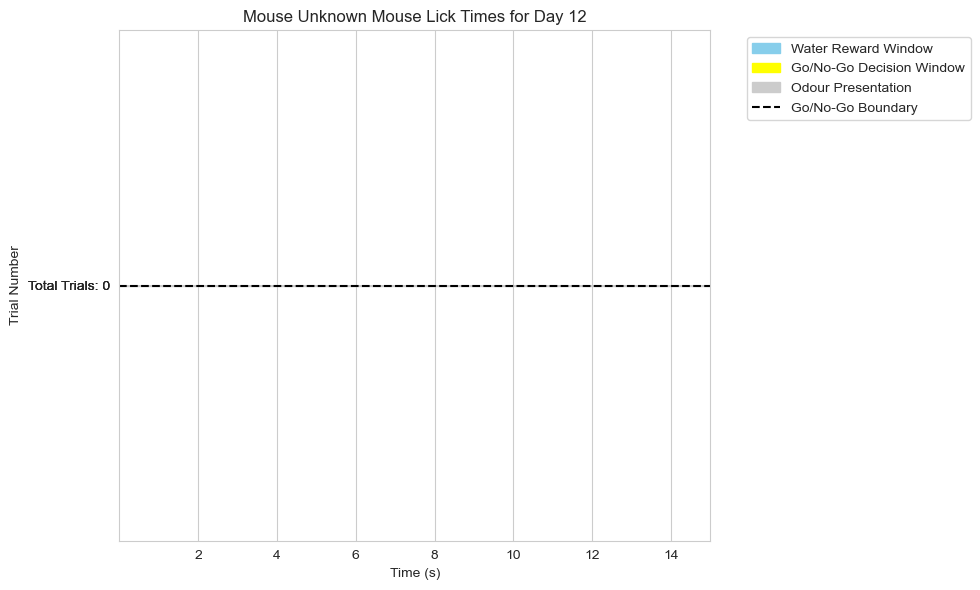

In [10]:
plot_lick_raster(df_maxwell_454, day=12)
